<a href="https://colab.research.google.com/github/ymuto0302/base2_2020/blob/master/pop_density.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 地理情報の活用(2)：「地図で見る統計(統計GIS)」を用いた人口密度分布の可視化

### geopandas のインストール (Google Colab / Linux の場合)
geopandas をインストールすると，以下のパッケージも併せてインストールされる。
- geopanda
- Fiona
- pyproj
- Shapely

In [1]:
!pip install geopandas

  Using cached https://files.pythonhosted.org/packages/e5/c3/071e080230ac4b6c64f1a2e2f9161c9737a2bc7b683d2c90b024825000c0/pyproj-2.6.1.post1-cp36-cp36m-manylinux2010_x86_64.whl
  Found existing installation: pyproj 1.9.6
    Uninstalling pyproj-1.9.6:
      Successfully uninstalled pyproj-1.9.6


## 人口密度の可視化
政府統計の総合窓口(e-Stat)では「地図で見る統計(統計GIS)」 https://www.e-stat.go.jp/gis が提供されており，国勢調査の結果等が公開されている。

ここで提供されるデータを元に「人口密度の可視化」を試みよう。

### Shape file の入手
「地図で見る統計(統計GIS)」 https://www.e-stat.go.jp/gis へアクセスする。

「境界データダウンロード → 小地域 → 国勢調査 → 2015年 → 小地域（町丁・字等別）」と順次，進む。

一気に飛ぶには下記の URL にアクセスする。

https://www.e-stat.go.jp/gis/statmap-search?page=1&type=2&aggregateUnitForBoundary=A&toukeiCode=00200521&toukeiYear=2015&serveyId=A002005212015

すると，下記のページへ到達する。

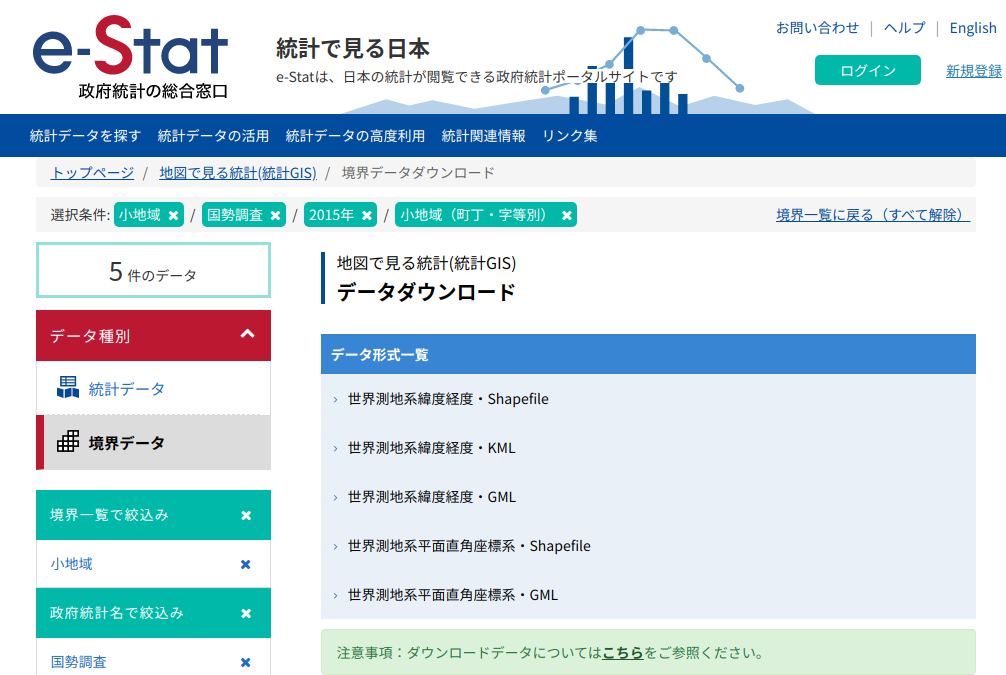

ここで「世界測地系緯度経度・Shapefile」を選択した後，自分の関心がある地域の shape file を入手する。

shape file に含まれるデータの詳細は「平成27年国勢調査町丁・字等別境界データ　データベース定義書」を参照すること。

https://www.e-stat.go.jp/gis/statmap-search/data?datatype=2&serveyId=A002005212015&downloadType=1

### (準備) Google Drive のマウント

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 山口県全域の分析
下記のページから山口県全域の shape file を入手する。

https://www.e-stat.go.jp/gis/statmap-search/data?dlserveyId=A002005212015&code=35&coordSys=1&format=shape&downloadType=5

ダウンロードしたファイルは zip 形式であるため，適当なディレクトリに展開する。


In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 地理情報データの読み込み
geodata = gpd.read_file('/content/drive/My Drive/BASE2/GeoData/e-stat/Yamaguchi/h27ka35.shp')

読み込まれたデータには，「平成27年国勢調査町丁・字等別境界データ　データベース定義書」にて定義された項目（列）である
KEY_CODE, PREF, PREF_NAME, AREA, JINKO 等が含まれる。

In [3]:
#読み込んだデータの先頭を表示（確認）
geodata.head()

,KEY_CODE,PREF,CITY,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,AREA,PERIMETER,H27KAxx_,H27KAxx_ID,KEN,KEN_NAME,SITYO_NAME,GST_NAME,CSS_NAME,KIHON1,DUMMY1,KIHON2,KEYCODE1,KEYCODE2,AREA_MAX_F,KIGO_D,N_KEN,N_CITY,KIGO_I,MOJI,KBSUM,JINKO,SETAI,X_CODE,Y_CODE,KCODE1,geometry
0,352010010,35,201,001000,山口県,下関市,みもすそ川町,None,8101,442768.393,3227.962,1312,1311,35,山口県,None,下関市,None,0010,-,00,201001000,2010010,M,None,None,None,None,みもすそ川町,22,614,319,130.95720,33.96867,0010-00,"POLYGON ((130.95730 33.96578, 130.95720 33.965..."
1,352010020,35,201,002000,山口県,下関市,壇之浦町,None,8101,124091.706,2073.968,1857,1856,35,山口県,None,下関市,None,0020,-,00,201002000,2010020,M,None,None,None,None,壇之浦町,9,269,151,130.95358,33.96282,0020-00,"POLYGON ((130.95132 33.96013, 130.95126 33.960..."
2,35201003001,35,201,003001,山口県,下関市,本町１丁目,None,8101,82267.204,1776.367,3922,3921,35,山口県,None,下関市,None,0030,-,01,201003001,201003001,M,None,None,None,None,本町１丁目,12,300,189,130.95174,33.96380,0030-01,"POLYGON ((130.95137 33.96206, 130.95123 33.961..."
3,35201003002,35,201,003002,山口県,下関市,本町２丁目,None,8101,61971.124,1095.964,372,371,35,山口県,None,下関市,None,0030,-,02,201003002,201003002,M,None,None,None,None,本町２丁目,11,347,172,130.94960,33.96461,0030-02,"POLYGON ((130.95036 33.96348, 130.95035 33.963..."
4,35201003003,35,201,003003,山口県,下関市,本町３丁目,None,8101,98355.229,1720.175,3447,3446,35,山口県,None,下関市,None,0030,-,03,201003003,201003003,M,None,None,None,None,本町３丁目,10,217,108,130.94776,33.96626,0030-03,"POLYGON ((130.94823 33.96506, 130.94830 33.964..."


ここで分類コード (HCODE) は次の２つの値をもつ。
- 「8101」：町丁・字等
- 「8154」：水面調査区

値 8154 が意味する「水面調査区」とは一般に「海面」を指しており，人口密度を求める観点から不要だから削除する。
（可視化する際に邪魔になる，というのも理由のひとつである）

In [4]:
geodata = geodata[geodata['HCODE'] != 8154]

定義書に従うと，項目「JINKO」は人口総数（単位：人），項目「AREA」は面積（単位：平方メートル）である。

故に，人口総数(JINKO) ÷ 面積(AREA)により人口密度[人/m2]を求めることができる。

ここでは，人口密度 (POP_DENSITY) を新たな項目として GeoDataframe へ付与する。

In [5]:
# 人口密度を求める
geodata['POP_DENSITY'] = geodata['JINKO'] / geodata['AREA']

最後に可視化を行う。

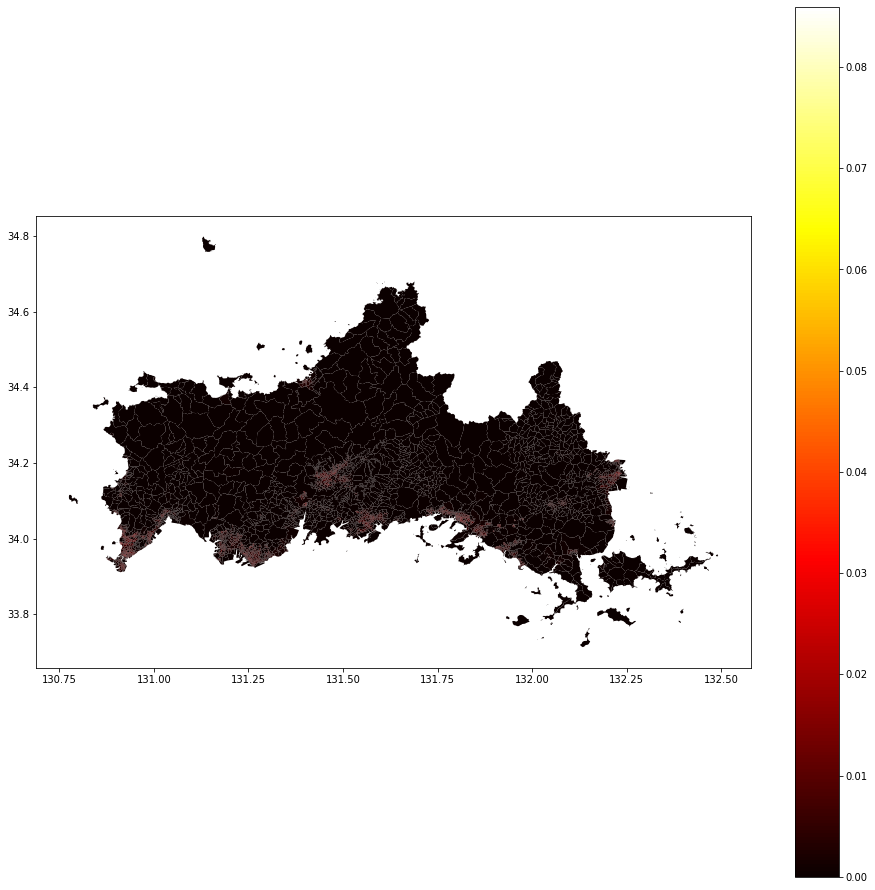

In [6]:
# 可視化
fig, ax = plt.subplots(1, figsize=(16, 16))
geodata.plot(ax=ax, column='POP_DENSITY', cmap='hot', legend=True)

### Leaflet web maps への投影

mplleaflet は matplotlib による描画をマップ上に投影するライブラリであり，インタラクティブな操作を可能とする。

https://pypi.org/project/mplleaflet/


In [7]:
# mplleaflet のインストール
!pip install mplleaflet

#### mplleaf (Anaconda を利用する場合)

In [ ]:
# Anaconda を利用する場合の投影（可視化）
import mplleaflet
import matplotlib.pyplot as plt

# legend(凡例)なしで再度，描画
fig, ax = plt.subplots() #1, figsize=(16, 16))
geodata.plot(ax=ax, column='POP_DENSITY', cmap='hot')

mplleaflet.show(fig) # Anacondaの場合はこちら（別ウィンドウにて HTML で表示）

実行結果を以下に示す。
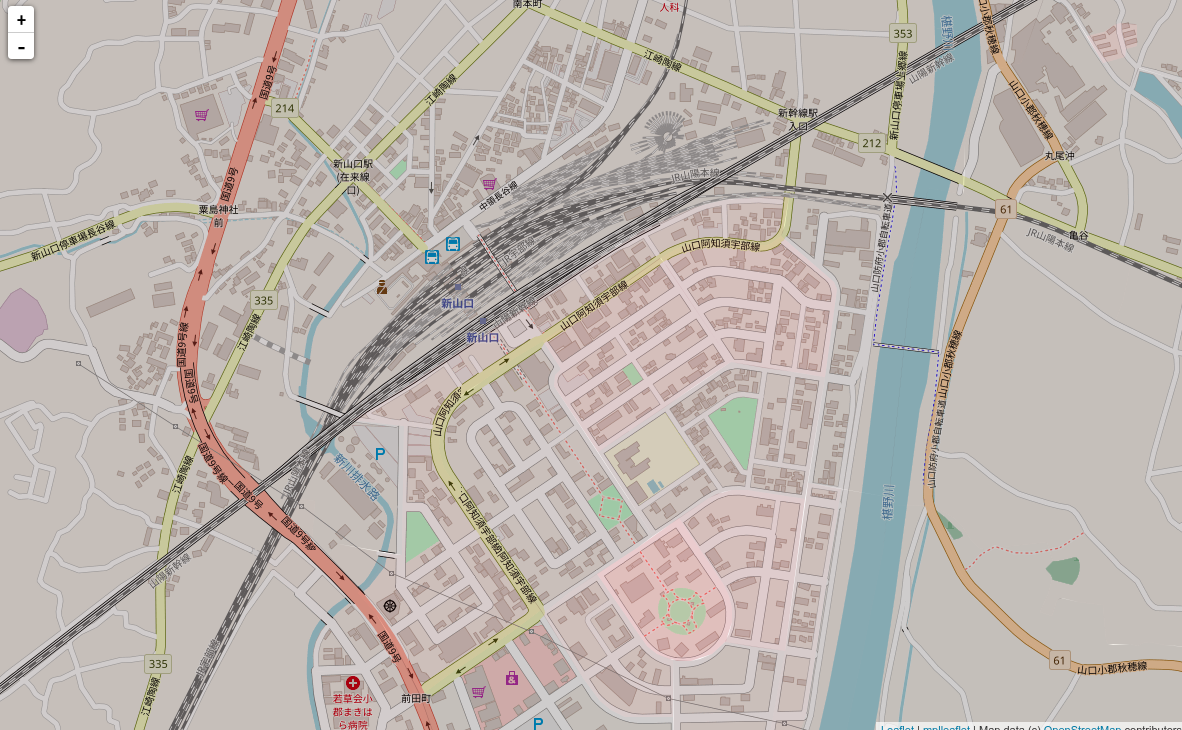

#### mplleaf (Google Colab を利用する場合)
Anaconda と異なり，うまく動かない。
おそらく geopandas のデータ構造と mplleaflet の実装が矛盾していると思われる。geopandas / mplleaflet / pyproj のバージョンを上手に組み合わせれば動作するかもしれない。

Google Colab 上で「leaflet map への投影」を行いたい場合，以下の手順を踏むこと：
1. mplleaflet.save_html() により実行結果を HTML ファイルへ出力する（ファイルは Google Drive 上に保存される)
1. Google Drive から当該ファイルをダウンロードし，ブラウザで表示する

In [21]:
# Google Colab を利用する場合の投影（可視化）
import mplleaflet

# legend(凡例)なしで再度，描画
fig, ax = plt.subplots(figsize=(16, 16))
geodata.plot(ax=ax, column='POP_DENSITY', cmap='hot')

# mplleaflet.display(fig=fig) # NG ! 「ランタイムの切断」というメッセージが出てくる
# mplleaflet.fig_to_html(fig=ax.figure) # OK! ただし，HTML が標準出力へ出てくる
# mplleaflet.save_html(fig=fig, fileobj="/content/drive/My Drive/out.html") # これは動作 OK! ただし，ダウンロード → 表示の手間がかかる

## (メモ) Google Colab 上で mplleaflet 自体は動作するようだ。しかし，ax を用いて画像を重ねるとうまく notebook へ埋め込めない！

In [ ]:
# mplleaflet 自体は動作する！
mplleaflet.display()

# 本日の課題
課題は２つ：
1. 宇部市の shape file を用いて，人口密度を可視化せよ。
1. 将来，住みたいと思っている市・区の人口密度を可視化せよ。（ただし，現在の居住地を除く）

（余力がれば）mplleaflet を用いた「地図への投影」を試してください。

## (参考) 東京都の人口分布
もっとも人口の多い東京都の人口分布を可視化する。

予め「東京都全域」の shape data を入手しておくことが前提である。

<AxesSubplot:>

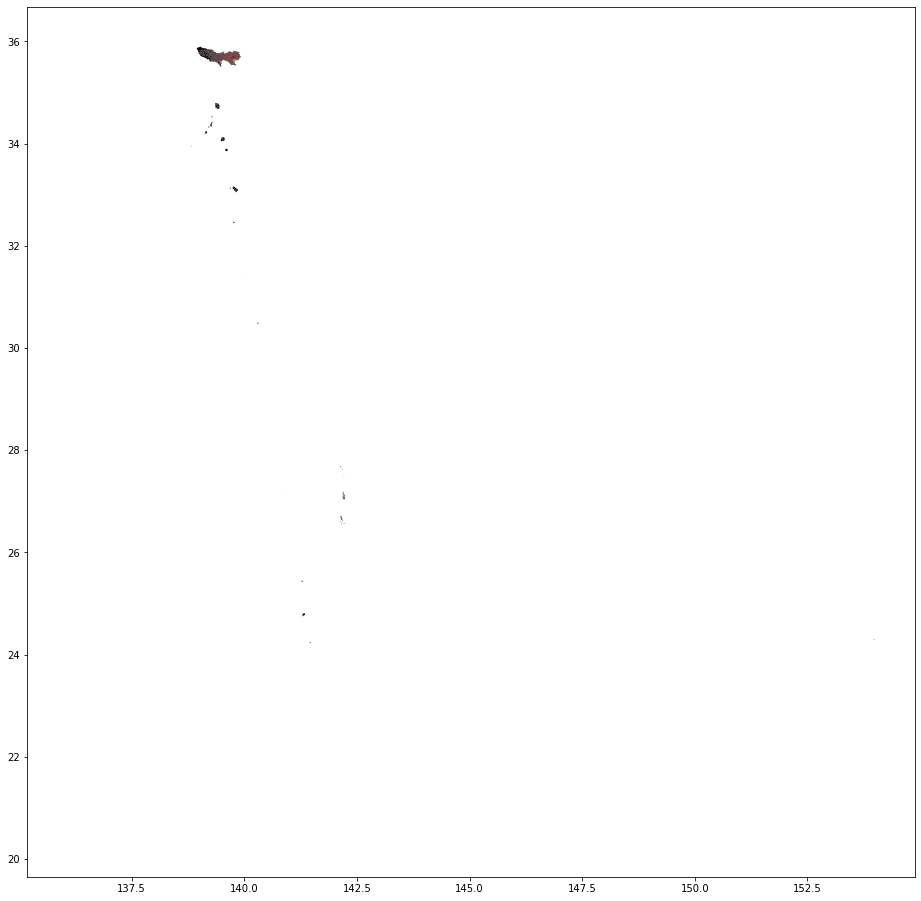

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 地理情報データの読み込み
geodata = gpd.read_file('/home/muto/public_html/Education/2020/Senmon2/GeoData/e-stat/Tokyo/h27ka13.shp')
geodata = geodata[geodata['HCODE'] != 8154] # 海を除く

# 人口密度を求める
geodata['POP_DENSITY'] = geodata['JINKO'] / geodata['AREA']

# 可視化
fig, ax = plt.subplots(1, figsize=(16, 16))
geodata.plot(ax=ax, column='POP_DENSITY', cmap='hot')

### 東京都が小さくなってしまった！！
実は，伊豆諸島と小笠原諸島は東京都の一部であり，東京都の面積がばかでかいのが原因である。

上記の出力から判断するに，伊豆諸島と小笠原諸島を除くには「北緯 >= 35度以上」に限定すればよさそうである。

読み込んだ GeoDataframe において「X_CODE」が経度，「Y_CODE」が緯度に当たることから，これを利用する。

<AxesSubplot:>

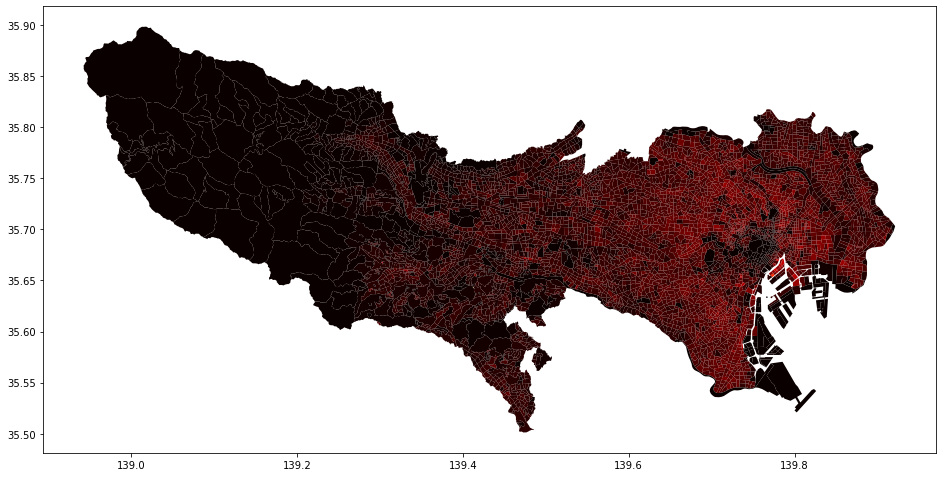

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 地理情報データの読み込み
geodata = gpd.read_file('/home/muto/public_html/Education/2020/Senmon2/GeoData/e-stat/Tokyo/h27ka13.shp')
geodata = geodata[geodata['HCODE'] != 8154] # 海を除く
geodata = geodata[geodata['Y_CODE'] >= 35.0] # 島しょ部を除く

# 人口密度を求める
geodata['POP_DENSITY'] = geodata['JINKO'] / geodata['AREA']

# 可視化
fig, ax = plt.subplots(1, figsize=(16, 16))
geodata.plot(ax=ax, column='POP_DENSITY', cmap='hot')

# 予告
近いうちに（上記の）境界データを用いた「店舗出店にあたっての商圏の評価」を取り上げる予定です。